<a href="https://colab.research.google.com/github/JeanCarlosB/lia1_2024_1/blob/main/Entregas%20-%20Jean%20Carlos/Aula10entrega.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
‎
---

<center>

 # Laboratório de Inovação e Automação 1 (LIA 1)
</center>

---
<center>
    <img src='https://github.com/JeanCarlosB/lia1_2024_1/blob/main/Entregas%20-%20Jean%20Carlos/ceu.png?raw=true' width='550' height='285' />
</center>

---
<center>

 #2024/1 | 24M34 | Lab 200 CAE
### Notebook desenvolvido por: [Jean Carlos Barros da Mata](https://github.com/JeanCarlosB)
### Ciência de dados
</center>

---

## bibliotecas utilizadas:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

---
## Lendo o arquivo csv disponivel em:
### *https://dados.gov.br/dados/conjuntos-dados/resultado-da-arrecadacao*
### obs: só foram usado as primeiras 100 linhas
---

In [2]:

df = pd.read_csv('/content/drive/MyDrive/LIA/Aula 10/arrecadacao-estado.csv', sep=';', encoding='ISO-8859-1', index_col=None)

In [3]:
df.shape

(7830, 45)

In [4]:
df.head()

,Ano,Mês,UF,IMPOSTO_SOBRE_IMPORTAÇÃO,IMPOSTO_SOBRE_EXPORTAÇÃO,IPI_FUMO,IPI_BEBIDAS,IPI_AUTOMÓVEIS,IPI_VINCULADO_A_IMPORTACAO,IPI_OUTROS,...,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44
0,2000.0,Janeiro,AC,231,0,292096,0,0,167,1558,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000.0,Janeiro,AL,475088,33873,1329338,812470,0,141735,3676847,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000.0,Janeiro,AM,11679405,0,1507146,1791471,27796,4414483,1800346,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000.0,Janeiro,AP,24267,0,424862,1419,321,22333,12165,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000.0,Janeiro,BA,10476457,13,5542123,11533707,0,7496476,23743858,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.tail()

,Ano,Mês,UF,IMPOSTO_SOBRE_IMPORTAÇÃO,IMPOSTO_SOBRE_EXPORTAÇÃO,IPI_FUMO,IPI_BEBIDAS,IPI_AUTOMÓVEIS,IPI_VINCULADO_A_IMPORTACAO,IPI_OUTROS,...,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44
7825,2024.0,Fevereiro,RR,"291272,19",0,0,0,"10900,37","89409,81","74004,94",...,NaN,NaN,NaN,NaN,"1013457,87",NaN,"78115647,31",NaN,NaN,"5513225,268"
7826,2024.0,Fevereiro,SC,1138075792,"11532,07",0,"12013426,38","20099350,34","419886236,2","295827338,8",...,NaN,NaN,NaN,NaN,"117213802,1",NaN,2697495353,NaN,NaN,"72931300,43"
7827,2024.0,Fevereiro,SP,1618983126,"-153868,69","2511346,8","59024402,59","190801850,5","517117088,2",1153454774,...,NaN,NaN,NaN,NaN,1071725822,NaN,18856419314,NaN,NaN,"541252028,7"
7828,2024.0,Fevereiro,SE,"5950794,2","-74,03","551736,85","2419363,83",0,"799471,85","6795753,86",...,NaN,NaN,NaN,NaN,"5913732,48",NaN,"251867202,1",NaN,NaN,"7226813,401"
7829,2024.0,Fevereiro,TO,"5952162,94","-0,01",0,"2796,72",0,"2485471,82","1189319,25",...,NaN,NaN,NaN,NaN,"1803311,64",NaN,"187057436,1",NaN,NaN,"12979527,31"


In [6]:
df.dtypes

Ano                                      float64
Mês                                       object
UF                                        object
IMPOSTO_SOBRE_IMPORTAÇÃO                  object
IMPOSTO_SOBRE_EXPORTAÇÃO                  object
IPI_FUMO                                  object
IPI_BEBIDAS                               object
IPI_AUTOMÓVEIS                            object
IPI_VINCULADO_A_IMPORTACAO                object
IPI_OUTROS                                object
IRPF                                      object
IRPJ_ENTIDADES_FINANCEIRAS                object
IRPJ_DEMAIS_EMPRESAS                      object
IRRF_RENDIMENTOS_DO_TRABALHO              object
IRRF_RENDIMENTOS_DO_CAPITAL               object
IRRF_REMESSAS_P_EXTERIOR                  object
IRRF_OUTROS_RENDIMENTOS                   object
IMPOSTO_S_OPERAÇÕES_FINANCEIRAS           object
IMPOSTO_TERRITORIAL_RURAL                 object
IMPOSTO_PROVIS_S_MOVIMENT_FINANC_IPMF    float64
CPMF                

---
# removendo as colunas 'unnamed'
---

In [7]:
df = df.filter(regex='^(?!Unnamed).*$')

In [8]:
df.head()

,Ano,Mês,UF,IMPOSTO_SOBRE_IMPORTAÇÃO,IMPOSTO_SOBRE_EXPORTAÇÃO,IPI_FUMO,IPI_BEBIDAS,IPI_AUTOMÓVEIS,IPI_VINCULADO_A_IMPORTACAO,IPI_OUTROS,...,IMPOSTO_S_OPERAÇÕES_FINANCEIRAS,IMPOSTO_TERRITORIAL_RURAL,IMPOSTO_PROVIS_S_MOVIMENT_FINANC_IPMF,CPMF,COFINS,CONTRIBUICAO_PARA_O_PIS_PASEP,CSLL,CONTRIBUICAO_PLANO_SEG_SOC_SERVIDORES,CONTRIBUICCES_PARA_FUNDAF,OUTRAS_RECEITAS_ADMINISTRADAS
0,2000.0,Janeiro,AC,231,0,292096,0,0,167,1558,...,1220,28447,0.0,103,1770475.0,387364,392830,1243858.0,28329,20911
1,2000.0,Janeiro,AL,475088,33873,1329338,812470,0,141735,3676847,...,26939,4252539,0.0,97248,7493570.0,2545254,1775834,3179753.0,125043,127189
2,2000.0,Janeiro,AM,11679405,0,1507146,1791471,27796,4414483,1800346,...,843881,40171,0.0,832562,44000981.0,11671871,7652859,4072567.0,161647,187988
3,2000.0,Janeiro,AP,24267,0,424862,1419,321,22333,12165,...,6999,6477,0.0,0,1682102.0,574124,346964,3981691.0,38738,10769
4,2000.0,Janeiro,BA,10476457,13,5542123,11533707,0,7496476,23743858,...,1218485,2446535,0.0,11923442,81027229.0,23138894,15699282,17001662.0,687022,536498


In [9]:
df.tail()

,Ano,Mês,UF,IMPOSTO_SOBRE_IMPORTAÇÃO,IMPOSTO_SOBRE_EXPORTAÇÃO,IPI_FUMO,IPI_BEBIDAS,IPI_AUTOMÓVEIS,IPI_VINCULADO_A_IMPORTACAO,IPI_OUTROS,...,IMPOSTO_S_OPERAÇÕES_FINANCEIRAS,IMPOSTO_TERRITORIAL_RURAL,IMPOSTO_PROVIS_S_MOVIMENT_FINANC_IPMF,CPMF,COFINS,CONTRIBUICAO_PARA_O_PIS_PASEP,CSLL,CONTRIBUICAO_PLANO_SEG_SOC_SERVIDORES,CONTRIBUICCES_PARA_FUNDAF,OUTRAS_RECEITAS_ADMINISTRADAS
7825,2024.0,Fevereiro,RR,"291272,19",0,0,0,"10900,37","89409,81","74004,94",...,"96781,42","108973,42",NaN,NaN,NaN,"3093,84","13151404,29",NaN,"502,8","8444384,84"
7826,2024.0,Fevereiro,SC,1138075792,"11532,07",0,"12013426,38","20099350,34","419886236,2","295827338,8",...,"79198077,82","832697,97",NaN,NaN,NaN,"2225332,82",2144624610,NaN,"356746,22","544397718,4"
7827,2024.0,Fevereiro,SP,1618983126,"-153868,69","2511346,8","59024402,59","190801850,5","517117088,2",1153454774,...,3507794694,"6488712,39",NaN,NaN,NaN,1224911578,11227994173,NaN,"191813799,5",2937116808
7828,2024.0,Fevereiro,SE,"5950794,2","-74,03","551736,85","2419363,83",0,"799471,85","6795753,86",...,"4595736,22","66089,19",NaN,NaN,NaN,"2594869,75","77894700,6",NaN,"421688,85","27739134,78"
7829,2024.0,Fevereiro,TO,"5952162,94","-0,01",0,"2796,72",0,"2485471,82","1189319,25",...,"457641,34","1591840,91",NaN,NaN,NaN,"30951,48","47889025,91",NaN,"5029,61","19157063,62"


In [10]:
df.shape

(7830, 27)

In [11]:
df.dtypes

Ano                                      float64
Mês                                       object
UF                                        object
IMPOSTO_SOBRE_IMPORTAÇÃO                  object
IMPOSTO_SOBRE_EXPORTAÇÃO                  object
IPI_FUMO                                  object
IPI_BEBIDAS                               object
IPI_AUTOMÓVEIS                            object
IPI_VINCULADO_A_IMPORTACAO                object
IPI_OUTROS                                object
IRPF                                      object
IRPJ_ENTIDADES_FINANCEIRAS                object
IRPJ_DEMAIS_EMPRESAS                      object
IRRF_RENDIMENTOS_DO_TRABALHO              object
IRRF_RENDIMENTOS_DO_CAPITAL               object
IRRF_REMESSAS_P_EXTERIOR                  object
IRRF_OUTROS_RENDIMENTOS                   object
IMPOSTO_S_OPERAÇÕES_FINANCEIRAS           object
IMPOSTO_TERRITORIAL_RURAL                 object
IMPOSTO_PROVIS_S_MOVIMENT_FINANC_IPMF    float64
CPMF                

---
# removendo duplicações
---

In [12]:
df[df.duplicated()]

,Ano,Mês,UF,IMPOSTO_SOBRE_IMPORTAÇÃO,IMPOSTO_SOBRE_EXPORTAÇÃO,IPI_FUMO,IPI_BEBIDAS,IPI_AUTOMÓVEIS,IPI_VINCULADO_A_IMPORTACAO,IPI_OUTROS,...,IMPOSTO_S_OPERAÇÕES_FINANCEIRAS,IMPOSTO_TERRITORIAL_RURAL,IMPOSTO_PROVIS_S_MOVIMENT_FINANC_IPMF,CPMF,COFINS,CONTRIBUICAO_PARA_O_PIS_PASEP,CSLL,CONTRIBUICAO_PLANO_SEG_SOC_SERVIDORES,CONTRIBUICCES_PARA_FUNDAF,OUTRAS_RECEITAS_ADMINISTRADAS
101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3408,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3409,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Remover todas as linhas duplicadas vazias (NaN)
df = df.drop_duplicates().dropna()

In [14]:
df.shape

(100, 27)

In [15]:
df.head(10)

,Ano,Mês,UF,IMPOSTO_SOBRE_IMPORTAÇÃO,IMPOSTO_SOBRE_EXPORTAÇÃO,IPI_FUMO,IPI_BEBIDAS,IPI_AUTOMÓVEIS,IPI_VINCULADO_A_IMPORTACAO,IPI_OUTROS,...,IMPOSTO_S_OPERAÇÕES_FINANCEIRAS,IMPOSTO_TERRITORIAL_RURAL,IMPOSTO_PROVIS_S_MOVIMENT_FINANC_IPMF,CPMF,COFINS,CONTRIBUICAO_PARA_O_PIS_PASEP,CSLL,CONTRIBUICAO_PLANO_SEG_SOC_SERVIDORES,CONTRIBUICCES_PARA_FUNDAF,OUTRAS_RECEITAS_ADMINISTRADAS
0,2000.0,Janeiro,AC,231,0,292096,0,0,167,1558,...,1220,28447,0.0,103,1770475.0,387364,392830,1243858.0,28329,20911
1,2000.0,Janeiro,AL,475088,33873,1329338,812470,0,141735,3676847,...,26939,4252539,0.0,97248,7493570.0,2545254,1775834,3179753.0,125043,127189
2,2000.0,Janeiro,AM,11679405,0,1507146,1791471,27796,4414483,1800346,...,843881,40171,0.0,832562,44000981.0,11671871,7652859,4072567.0,161647,187988
3,2000.0,Janeiro,AP,24267,0,424862,1419,321,22333,12165,...,6999,6477,0.0,0,1682102.0,574124,346964,3981691.0,38738,10769
4,2000.0,Janeiro,BA,10476457,13,5542123,11533707,0,7496476,23743858,...,1218485,2446535,0.0,11923442,81027229.0,23138894,15699282,17001662.0,687022,536498
5,2000.0,Janeiro,CE,5576921,0,4535653,3148254,0,1734529,3716458,...,745659,114393,0.0,4547426,36892799.0,8743377,6505382,8618224.0,506146,143952
6,2000.0,Janeiro,DF,2254341,43,3197500,2777942,0,2079272,2433339,...,22472279,64578,0.0,240726401,141910257.0,61028823,27194137,74389957.0,534320,33937318
7,2000.0,Janeiro,ES,31950799,0,3598736,20408,1503039,26840430,4036463,...,491261,1563052,0.0,28681,49157907.0,13289266,12890143,6038251.0,2164901,382985
8,2000.0,Janeiro,GO,3747911,0,3236092,5064141,1091185,986314,2654994,...,638840,2269467,0.0,3912150,47986002.0,13569190,8180079,7394364.0,658643,403579
9,2000.0,Janeiro,MA,1714749,69,1124738,4061569,0,206691,484436,...,86071,593391,0.0,612313,9654439.0,5104547,2283622,2966912.0,120868,121337


In [16]:
df.tail()

,Ano,Mês,UF,IMPOSTO_SOBRE_IMPORTAÇÃO,IMPOSTO_SOBRE_EXPORTAÇÃO,IPI_FUMO,IPI_BEBIDAS,IPI_AUTOMÓVEIS,IPI_VINCULADO_A_IMPORTACAO,IPI_OUTROS,...,IMPOSTO_S_OPERAÇÕES_FINANCEIRAS,IMPOSTO_TERRITORIAL_RURAL,IMPOSTO_PROVIS_S_MOVIMENT_FINANC_IPMF,CPMF,COFINS,CONTRIBUICAO_PARA_O_PIS_PASEP,CSLL,CONTRIBUICAO_PLANO_SEG_SOC_SERVIDORES,CONTRIBUICCES_PARA_FUNDAF,OUTRAS_RECEITAS_ADMINISTRADAS
95,2000.0,Abril,PB,998391,0,1929333,778395,0,430864,1676840,...,146162,16393,0.0,187375,9464873.0,2658101,2765320,6891385.0,189815,55492
96,2000.0,Abril,PR,53090478,0,8723042,5036162,34775954,35566257,34232468,...,9121231,207266,0.0,73591145,127468351.0,25638454,32553957,9057448.0,965407,1377701
97,2000.0,Abril,PE,8534629,0,6298798,5553873,0,4040788,9617999,...,801417,37211,0.0,2909938,46558690.0,13838128,15663087,10595414.0,952946,227318
98,2000.0,Abril,PI,218222,0,800617,42627,0,66586,305624,...,47430,40020,0.0,177158,6694621.0,2123073,2741857,3423407.0,76978,81351
99,2000.0,Abril,RJ,42783664,0,24505082,23060908,4081079,22411239,57264414,...,15837756,54281,0.0,27773395,683454439.0,175100935,152827321,25562091.0,3786126,1948187


In [17]:
df.isnull().sum()

Ano                                      0
Mês                                      0
UF                                       0
IMPOSTO_SOBRE_IMPORTAÇÃO                 0
IMPOSTO_SOBRE_EXPORTAÇÃO                 0
IPI_FUMO                                 0
IPI_BEBIDAS                              0
IPI_AUTOMÓVEIS                           0
IPI_VINCULADO_A_IMPORTACAO               0
IPI_OUTROS                               0
IRPF                                     0
IRPJ_ENTIDADES_FINANCEIRAS               0
IRPJ_DEMAIS_EMPRESAS                     0
IRRF_RENDIMENTOS_DO_TRABALHO             0
IRRF_RENDIMENTOS_DO_CAPITAL              0
IRRF_REMESSAS_P_EXTERIOR                 0
IRRF_OUTROS_RENDIMENTOS                  0
IMPOSTO_S_OPERAÇÕES_FINANCEIRAS          0
IMPOSTO_TERRITORIAL_RURAL                0
IMPOSTO_PROVIS_S_MOVIMENT_FINANC_IPMF    0
CPMF                                     0
COFINS                                   0
CONTRIBUICAO_PARA_O_PIS_PASEP            0
CSLL       

---
# 1 Qual Estado tem o menor imposto sobre importação?
---

In [18]:
df1 = df.loc[df['IMPOSTO_SOBRE_IMPORTAÇÃO'].astype(float).idxmin(), 'UF']

In [19]:
print ("O Estado com menor imposto sobre importação é:",df1)

O Estado com menor imposto sobre importação é: AC


---
# 2 Qual o total de imposto dobre exportação em relação ao mês?
### usando gráfico de barras
---

In [20]:
# Convertendo a coluna 'IMPOSTO_SOBRE_EXPORTAÇÃO' para tipo numérico
df['IMPOSTO_SOBRE_EXPORTAÇÃO'] = pd.to_numeric(df['IMPOSTO_SOBRE_EXPORTAÇÃO'], errors='coerce')

# Agrupando por ano e somando os valores de imposto sobre exportação
df2= df.groupby('Mês')['IMPOSTO_SOBRE_EXPORTAÇÃO'].sum()


In [21]:
df2.head()

Mês
Abril        35229
Fevereiro    27771
Janeiro      52301
Março        37345
Name: IMPOSTO_SOBRE_EXPORTAÇÃO, dtype: int64

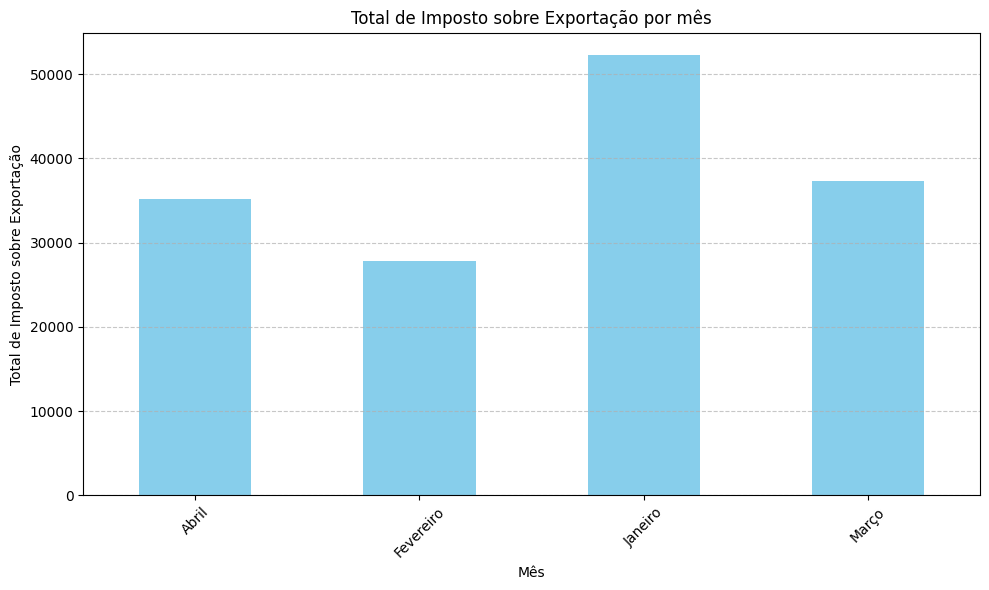

In [22]:
plt.figure(figsize=(10, 6))
df2.plot(kind='bar', color='skyblue')
plt.title('Total de Imposto sobre Exportação por mês')
plt.xlabel('Mês')
plt.ylabel('Total de Imposto sobre Exportação')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

---
# **3 Qual mês teve-se a maior outras receitas administradas?**
como gráfico de pizza 🍕

---

<ipython-input-23-0c33bacccf9d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_other_revenues['OUTRAS_RECEITAS_ADMINISTRADAS'] = pd.to_numeric(df_other_revenues['OUTRAS_RECEITAS_ADMINISTRADAS'], errors='coerce')


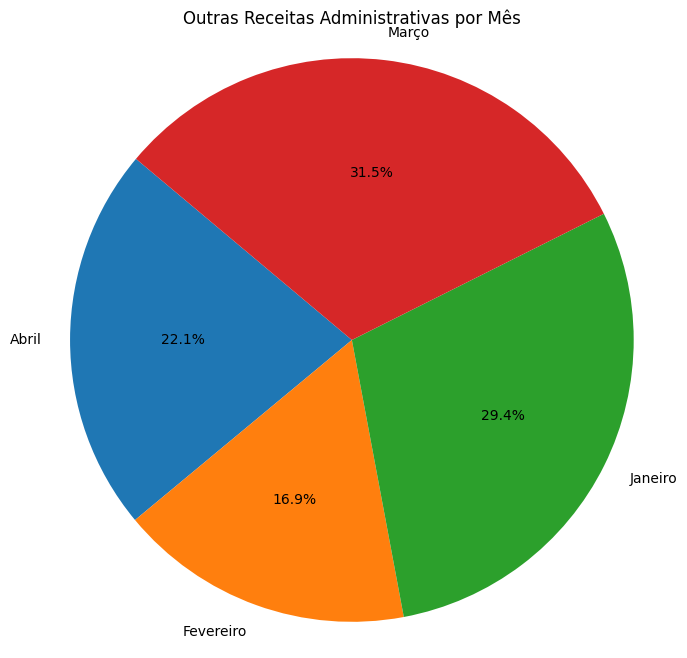

In [23]:
# Filtrando apenas as colunas necessárias
df_other_revenues = df[['Mês', 'OUTRAS_RECEITAS_ADMINISTRADAS']]

# Convertendo a coluna 'OUTRAS_RECEITAS_ADMINISTRADAS' para tipo numérico
df_other_revenues['OUTRAS_RECEITAS_ADMINISTRADAS'] = pd.to_numeric(df_other_revenues['OUTRAS_RECEITAS_ADMINISTRADAS'], errors='coerce')

# Agrupando por mês e calculando a soma das outras receitas administrativas
total_por_mes = df_other_revenues.groupby('Mês')['OUTRAS_RECEITAS_ADMINISTRADAS'].sum()

# Plotando o gráfico de pizza
plt.figure(figsize=(8, 8))
total_por_mes.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Outras Receitas Administrativas por Mês')
plt.ylabel('')
plt.axis('equal')  # Para garantir que o gráfico de pizza seja circular
plt.show()

---
# **4 bônus que reduz CSLL em 25% se o imposto de importção e expostação de uma dada UF forem menor do que a média de todos os outros Estados em relação ao imposto de importção e expostação**
Quantos Estados vão receber esse bônus?

---

In [24]:
# Remover as linhas duplicadas do DataFrame para evitar contagem duplicada de estados
df_sem_duplicatas = df.drop_duplicates(subset=['UF']).copy()

# Convertendo as colunas 'IMPOSTO_SOBRE_IMPORTAÇÃO' e 'IMPOSTO_SOBRE_EXPORTAÇÃO' para tipo numérico
df_sem_duplicatas.loc[:, 'IMPOSTO_SOBRE_IMPORTAÇÃO'] = pd.to_numeric(df_sem_duplicatas['IMPOSTO_SOBRE_IMPORTAÇÃO'], errors='coerce')
df_sem_duplicatas.loc[:, 'IMPOSTO_SOBRE_EXPORTAÇÃO'] = pd.to_numeric(df_sem_duplicatas['IMPOSTO_SOBRE_EXPORTAÇÃO'], errors='coerce')

# Calcular as médias dos impostos de importação e exportação para todos os estados
media_importacao = df_sem_duplicatas['IMPOSTO_SOBRE_IMPORTAÇÃO'].mean()
media_exportacao = df_sem_duplicatas['IMPOSTO_SOBRE_EXPORTAÇÃO'].mean()

# Verificar se os impostos de importação e exportação de cada estado são menores do que as médias calculadas
df_sem_duplicatas['Atende_Condicao'] = (df_sem_duplicatas['IMPOSTO_SOBRE_IMPORTAÇÃO'] < media_importacao) & (df_sem_duplicatas['IMPOSTO_SOBRE_EXPORTAÇÃO'] < media_exportacao)

# Contar quantos estados atendem à condição
estados_com_bonus = df_sem_duplicatas[df_sem_duplicatas['Atende_Condicao']].shape[0]

print("Quantidade de estados que receberão o bônus:", estados_com_bonus)


Quantidade de estados que receberão o bônus: 20


---
# **5 Considere que o bônus foi aplicado, qual seria a nova média de CSLL?**
---

In [25]:
# Converter a coluna 'CSLL' para tipo numérico
df_sem_duplicatas['CSLL'] = pd.to_numeric(df_sem_duplicatas['CSLL'], errors='coerce')

# Aplicar o bônus de redução de CSLL em 25% nos estados que atendem à condição
df_sem_duplicatas.loc[df_sem_duplicatas['Atende_Condicao'], 'CSLL'] *= 0.75  # Reduzir em 25%

# Calcular a nova média de CSLL
nova_media_csll = round(df_sem_duplicatas['CSLL'].mean(), 2)

print("Nova média de CSLL após a aplicação do bônus:", nova_media_csll)

Nova média de CSLL após a aplicação do bônus: 22505414.24


---
# **6 Como fica o valor de cada linha com o CSLL atualizado?**
---

In [26]:
# Criar uma nova coluna 'CSLL_Atualizado' com o valor inicial de CSLL
df_sem_duplicatas['CSLL_Atualizado'] = df_sem_duplicatas['CSLL']

# Atualizar os valores de CSLL para os estados que atendem à condição
df_sem_duplicatas.loc[df_sem_duplicatas['Atende_Condicao'], 'CSLL_Atualizado'] *= 0.75

# Exibir o DataFrame atualizado
df_sem_duplicatas.head()

,Ano,Mês,UF,IMPOSTO_SOBRE_IMPORTAÇÃO,IMPOSTO_SOBRE_EXPORTAÇÃO,IPI_FUMO,IPI_BEBIDAS,IPI_AUTOMÓVEIS,IPI_VINCULADO_A_IMPORTACAO,IPI_OUTROS,...,IMPOSTO_PROVIS_S_MOVIMENT_FINANC_IPMF,CPMF,COFINS,CONTRIBUICAO_PARA_O_PIS_PASEP,CSLL,CONTRIBUICAO_PLANO_SEG_SOC_SERVIDORES,CONTRIBUICCES_PARA_FUNDAF,OUTRAS_RECEITAS_ADMINISTRADAS,Atende_Condicao,CSLL_Atualizado
0,2000.0,Janeiro,AC,231,0,292096,0,0,167,1558,...,0.0,103,1770475.0,387364,294622.50,1243858.0,28329,20911,True,2.209669e+05
1,2000.0,Janeiro,AL,475088,33873,1329338,812470,0,141735,3676847,...,0.0,97248,7493570.0,2545254,1775834.00,3179753.0,125043,127189,False,1.775834e+06
2,2000.0,Janeiro,AM,11679405,0,1507146,1791471,27796,4414483,1800346,...,0.0,832562,44000981.0,11671871,5739644.25,4072567.0,161647,187988,True,4.304733e+06
3,2000.0,Janeiro,AP,24267,0,424862,1419,321,22333,12165,...,0.0,0,1682102.0,574124,260223.00,3981691.0,38738,10769,True,1.951672e+05
4,2000.0,Janeiro,BA,10476457,13,5542123,11533707,0,7496476,23743858,...,0.0,11923442,81027229.0,23138894,11774461.50,17001662.0,687022,536498,True,8.830846e+06


---
# **7 Crie um gráfico separado por mês em que cada mês mostra os 5 Estados com a maior CSLL e seus repesctivos valores em reais**
---

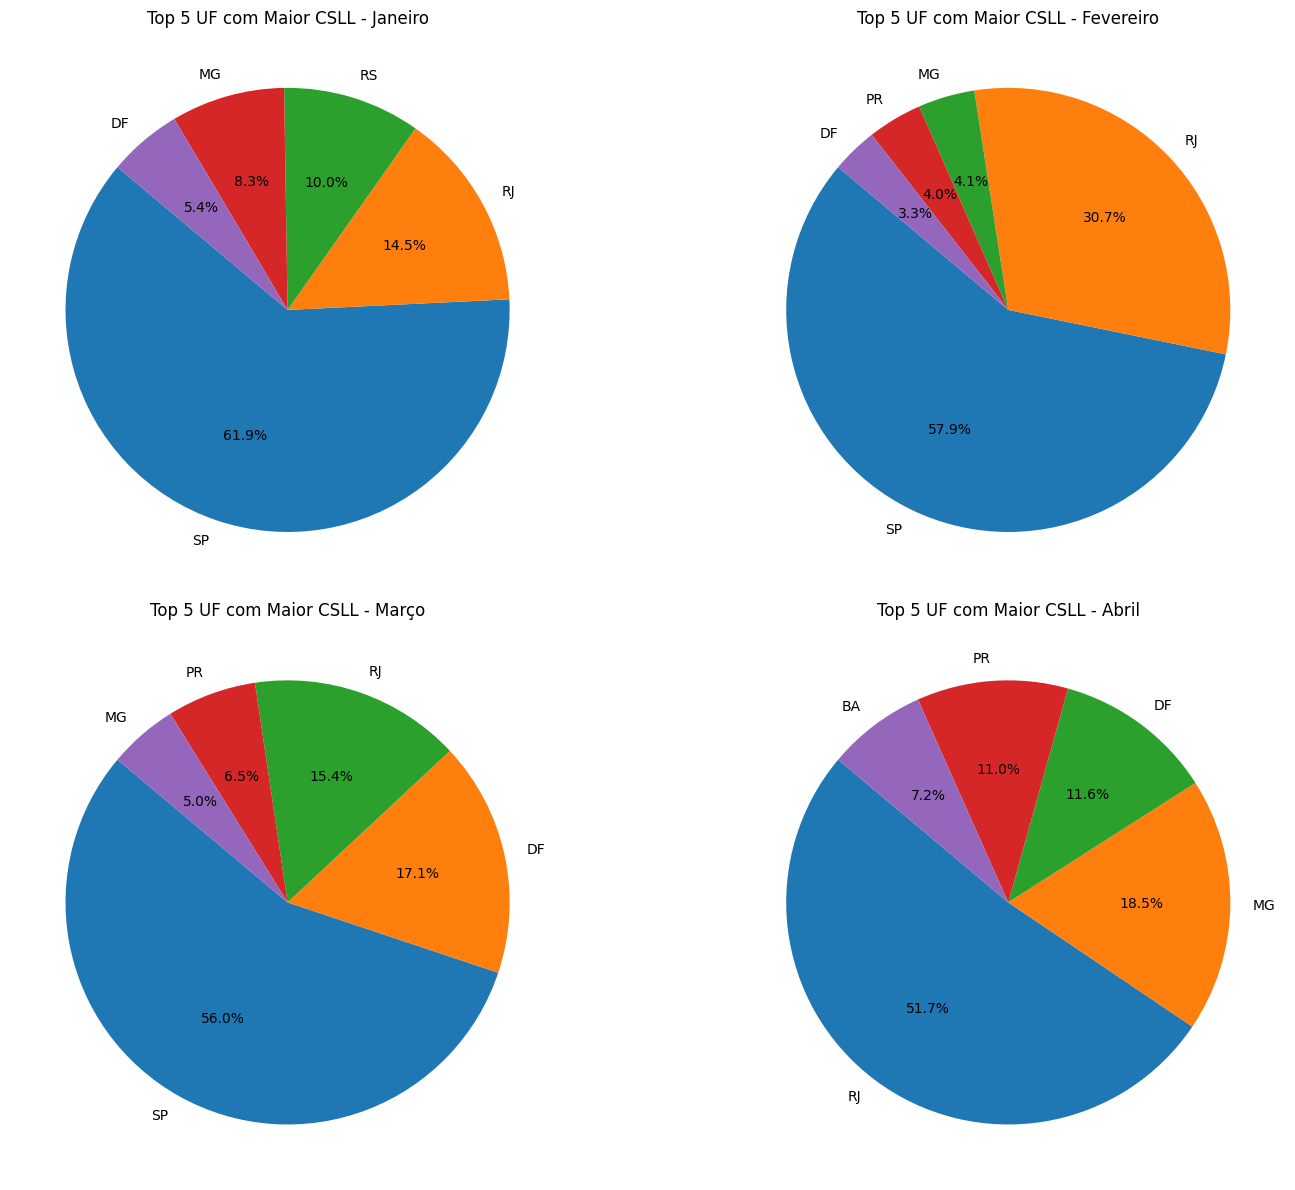

In [27]:
# Convertendo a coluna 'CSLL' para tipo numérico
df['CSLL'] = pd.to_numeric(df['CSLL'], errors='coerce')

# Criar a coluna 'CSLL_Atualizado' com os valores atualizados de CSLL
df['CSLL_Atualizado'] = df['CSLL'] * 0.75  # Redução de 25% conforme especificado

# Lista de meses
meses = df['Mês'].unique()

# Tamanho da figura
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
axes = axes.flatten()

# Plot para cada mês
for i, mes in enumerate(meses):
    # Selecionando os dados apenas para o mês específico
    dados_mes = df[df['Mês'] == mes]

    # Ordenando os dados pelo CSLL_Atualizado em ordem decrescente
    dados_mes = dados_mes.sort_values(by='CSLL_Atualizado', ascending=False)

    # Selecionando as cinco primeiras UF com maior CSLL_Atualizado
    top5_mes = dados_mes.head(5)

    # Gráfico de pizza
    axes[i].pie(top5_mes['CSLL_Atualizado'], labels=top5_mes['UF'], autopct='%1.1f%%', startangle=140)

    # Título do gráfico
    axes[i].set_title(f'Top 5 UF com Maior CSLL - {mes}')

# Ajuste de layout
plt.tight_layout()

# Exibição do gráfico
plt.show()